# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as q
%matplotlib inline

import re
import tensorflow as tf
import nltk
from wordcloud import WordCloud

In [2]:
# !pip install tensorflow==2.12
# !pip install nltk
# !pip install wordcloud

# Data Understanding

## Data Loading

In [3]:
df = pd.read_csv('./UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


## EDA

In [4]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

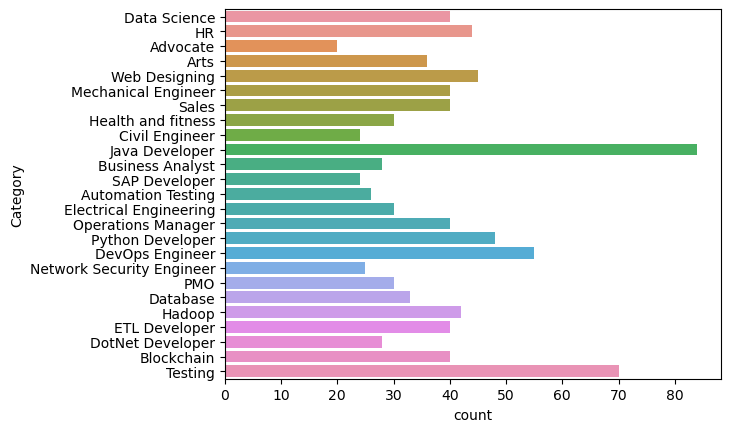

In [5]:
sns.countplot(y="Category", data=df);

## Data Cleaning

In [6]:
# clean the data
def clean_data(data):
    data = data.lower()
    # Remove URLs
    data = re.sub('http\S+\s*', ' ', data)
    # Remove RT and cc
    data = re.sub('RT|cc', ' ', data)
    # Remove hashtags
    data = re.sub('#\S+', '', data)
    # Remove mentions
    data = re.sub('@\S+', ' ', data)
    # Remove punctuations and non-ASCII characters
    data = re.sub('[^a-zA-Z]', ' ', data)
    # Remove extra whitespace
    data = re.sub('\s+', ' ', data)
    
    return data

In [7]:
df['Resume'] = df['Resume'].apply(clean_data)

In [8]:
df

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may to may b e uit rgpv data...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient in ms office word b...
958,Testing,willingness to a ept the challenges positive ...
959,Testing,personal skills quick learner eagerness to lea...
960,Testing,computer skills software knowledge ms power po...


In [11]:
def tokenize(text):
    words = re.split("\W+", text)
    return words

In [12]:
df['resume_split'] = df['Resume'].apply(lambda x: tokenize(x))
df.head()

,Category,Resume,resume_split
0,Data Science,skills programming languages python pandas num...,"[skills, programming, languages, python, panda..."
1,Data Science,education details may to may b e uit rgpv data...,"[education, details, may, to, may, b, e, uit, ..."
2,Data Science,areas of interest deep learning control system...,"[areas, of, interest, deep, learning, control,..."
3,Data Science,skills r python sap hana tableau sap hana sql ...,"[skills, r, python, sap, hana, tableau, sap, h..."
4,Data Science,education details mca ymcaust faridabad haryan...,"[education, details, mca, ymcaust, faridabad, ..."


### Stopwords

In [13]:
# nltk.download('stopwords')
# nltk.download('wordnet')

In [14]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

In [15]:
df['resume_split_stopword'] = df['resume_split'].apply(lambda x: remove_stopwords(x))
df['resume_split_stopword'].head()

0    [skills, programming, languages, python, panda...
1    [education, details, may, may, b, e, uit, rgpv...
2    [areas, interest, deep, learning, control, sys...
3    [skills, r, python, sap, hana, tableau, sap, h...
4    [education, details, mca, ymcaust, faridabad, ...
Name: resume_split_stopword, dtype: object

In [16]:
df

,Category,Resume,resume_split,resume_split_stopword
0,Data Science,skills programming languages python pandas num...,"[skills, programming, languages, python, panda...","[skills, programming, languages, python, panda..."
1,Data Science,education details may to may b e uit rgpv data...,"[education, details, may, to, may, b, e, uit, ...","[education, details, may, may, b, e, uit, rgpv..."
2,Data Science,areas of interest deep learning control system...,"[areas, of, interest, deep, learning, control,...","[areas, interest, deep, learning, control, sys..."
3,Data Science,skills r python sap hana tableau sap hana sql ...,"[skills, r, python, sap, hana, tableau, sap, h...","[skills, r, python, sap, hana, tableau, sap, h..."
4,Data Science,education details mca ymcaust faridabad haryan...,"[education, details, mca, ymcaust, faridabad, ...","[education, details, mca, ymcaust, faridabad, ..."
...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,"[computer, skills, proficient, in, ms, office,...","[computer, skills, proficient, ms, office, wor..."
958,Testing,willingness to a ept the challenges positive ...,"[, willingness, to, a, ept, the, challenges, p...","[, willingness, ept, challenges, positive, thi..."
959,Testing,personal skills quick learner eagerness to lea...,"[personal, skills, quick, learner, eagerness, ...","[personal, skills, quick, learner, eagerness, ..."
960,Testing,computer skills software knowledge ms power po...,"[computer, skills, software, knowledge, ms, po...","[computer, skills, software, knowledge, ms, po..."


## Stemming dan Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(word):
    return lemmatizer.lemmatize(word)

In [19]:
df['resume_split_stopword_lemma'] = df['resume_split_stopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['resume_split_stopword_lemma'].head()

0    [skill, programming, language, python, panda, ...
1    [education, detail, may, may, b, e, uit, rgpv,...
2    [area, interest, deep, learning, control, syst...
3    [skill, r, python, sap, hana, tableau, sap, ha...
4    [education, detail, mca, ymcaust, faridabad, h...
Name: resume_split_stopword_lemma, dtype: object

In [20]:
def concat(lst):
    sentence = ' '.join(lst)
    return sentence

df['join_words'] = df['resume_split_stopword_lemma'].apply(concat)
new_df = df[['Category', 'join_words']]
new_df

,Category,join_words
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may b e uit rgpv data sci...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...
957,Testing,computer skill proficient m office word basic ...
958,Testing,willingness ept challenge positive thinking g...
959,Testing,personal skill quick learner eagerness learn n...
960,Testing,computer skill software knowledge m power poin...


# Data Splitting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
text = df['join_words']
label = df['Category']
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.25,
                                                                  stratify=label, random_state=42)
text_train.shape, text_test.shape, label_train.shape, label_test.shape

((721,), (241,), (721,), (241,))

# Tokenizer & Padding

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
tokenizer = Tokenizer(num_words=1024, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [25]:
from keras.utils import to_categorical

# Mengubah label menjadi one-hot encoding
label_train_encoded = pd.get_dummies(label_train)
label_test_encoded = pd.get_dummies(label_test)

In [26]:
label_train_encoded

,Advocate,Arts,Automation Testing,Blockchain,Business Analyst,Civil Engineer,Data Science,Database,DevOps Engineer,DotNet Developer,...,Java Developer,Mechanical Engineer,Network Security Engineer,Operations Manager,PMO,Python Developer,SAP Developer,Sales,Testing,Web Designing
662,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
881,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
673,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
129,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Callbacks

In [27]:
import tensorflow as tf

In [28]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
            print("\nAkurasi model telah mencapai >90%")
            self.model.stop_training = True
callbacks = MyCallback()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1024, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
hist = model.fit(padded_train, label_train_encoded, epochs=150,
                 validation_data=(padded_test, label_test_encoded), verbose=2,
                 callbacks=[callbacks])

Epoch 1/150
23/23 - 41s - loss: 3.2128 - accuracy: 0.0499 - val_loss: 3.1965 - val_accuracy: 0.0747 - 41s/epoch - 2s/step
Epoch 2/150
23/23 - 37s - loss: 3.1743 - accuracy: 0.0763 - val_loss: 3.1317 - val_accuracy: 0.0747 - 37s/epoch - 2s/step
Epoch 3/150
23/23 - 39s - loss: 3.0960 - accuracy: 0.0971 - val_loss: 2.9827 - val_accuracy: 0.1411 - 39s/epoch - 2s/step
Epoch 4/150
23/23 - 46s - loss: 2.8870 - accuracy: 0.1526 - val_loss: 2.8192 - val_accuracy: 0.1618 - 46s/epoch - 2s/step
Epoch 5/150
23/23 - 42s - loss: 2.6394 - accuracy: 0.1553 - val_loss: 2.4199 - val_accuracy: 0.1950 - 42s/epoch - 2s/step
Epoch 6/150
23/23 - 44s - loss: 2.3103 - accuracy: 0.2358 - val_loss: 2.1454 - val_accuracy: 0.2822 - 44s/epoch - 2s/step
Epoch 7/150
23/23 - 35s - loss: 2.0772 - accuracy: 0.2996 - val_loss: 2.0358 - val_accuracy: 0.3278 - 35s/epoch - 2s/step
Epoch 8/150
23/23 - 40s - loss: 2.0713 - accuracy: 0.2982 - val_loss: 1.8149 - val_accuracy: 0.4232 - 40s/epoch - 2s/step
Epoch 9/150
23/23 - 43s 

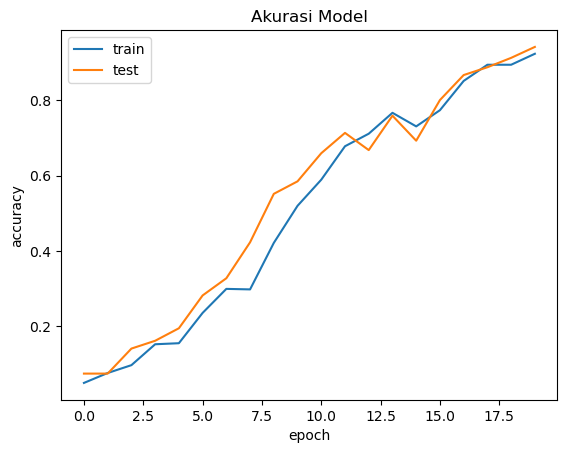

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

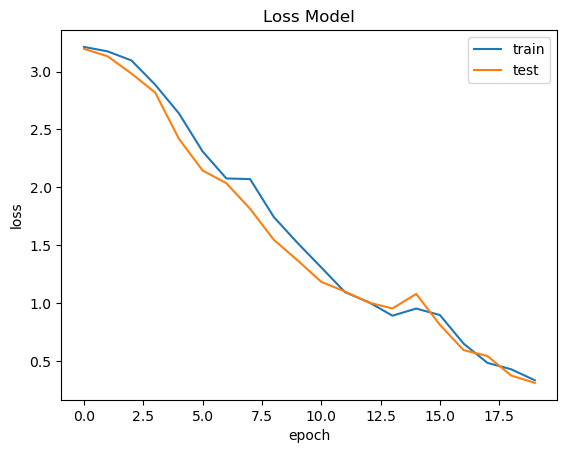

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
padded_train.shape

(721, 1488)

In [33]:
padded_test.shape

(241, 1488)

In [36]:
testing = "python"
tokenizer.fit_on_texts(testing)
tokenizer.texts_to_sequences(testing)
sequences_testing = tokenizer.texts_to_sequences(testing)
padded_testing = pad_sequences(sequences_testing)

model.predict(padded_testing)

1/1 [==============================] - 0s 30ms/step


array([[0.03800679, 0.01536216, 0.0459195 , 0.01761208, 0.05734814,
        0.11576092, 0.10367955, 0.05184166, 0.02167582, 0.01863144,
        0.03875209, 0.03360634, 0.05494843, 0.04162121, 0.01585064,
        0.02911439, 0.02576682, 0.0283397 , 0.0150663 , 0.01261291,
        0.01290418, 0.06276546, 0.06612793, 0.02308198, 0.05360354],
       [0.06301874, 0.03601708, 0.0627498 , 0.03995531, 0.04507383,
        0.08929905, 0.06152529, 0.03218896, 0.03923336, 0.02880704,
        0.0179682 , 0.04877952, 0.04686049, 0.03329748, 0.03448159,
        0.02445004, 0.02485791, 0.0291857 , 0.02398229, 0.02373931,
        0.02329121, 0.0715583 , 0.03800033, 0.03101623, 0.03066293],
       [0.06301874, 0.03601708, 0.0627498 , 0.03995531, 0.04507383,
        0.08929905, 0.06152529, 0.03218896, 0.03923336, 0.02880704,
        0.0179682 , 0.04877952, 0.04686049, 0.03329748, 0.03448159,
        0.02445004, 0.02485791, 0.0291857 , 0.02398229, 0.02373931,
        0.02329121, 0.0715583 , 0.03800033, 0.

# Data Testing

In [31]:
text = 'IBM Data Science\nCoursera\nMicroso/f_t Professional Program Certificate in Data Science \nMicroso/f_t \nGoogle Certified Professional Data Engineer \nGoogleAWARDS & CERTIFICATIONS:John Williams\nData Scientist\n101-900-6543\njohnwilliams@gmail.com\nCertified data scientist with 8 years of experience in providing data-driven solutions to increase eﬀiency\nand accuracy. Achievements include updating data streaming processes for an 18% reduction in redundancy,\nas well as improving the accuracy of predicted prices by 10%. Highly skilled in data visualisation, \nmachine learning and natural processing. \nXYZ TechnologiesWORK EXPERIENCE\n2014-2019 California\nGPA: 8.7Senior Data Scientist\nTasks\n• Developed end-to-end machine learning prototypes and scaled them to run in production environments. Increased \neﬀiciency by 23%\n• Derived actionable insights from massive data sets with minimal support. \n• Provided input into the collection of new data sources and the refinement of existing onces to improve analysis and \nmodel development. \nAchievements\n• Applied data mining to analyze procurement processes resulting in savings of $420,000 a year. Machine Learning Data Visualization Data Mining Python Scala NLP\nProblem Solving Fast Learner Leadership Risk Analyisis Time ManagementSKILLSET\nTechnical Skills\nSo/f_t Skills\nEDUCATION\nBSc in Statistics\nXYZ University\n07/2016-07/2019\nCourses: Probability and Statistics, Generalised Linear Models, Applied Statistics\n• Excelled in machine learning and data science coursework. \n• President, AI club.Tumor detection using thermal images\n• Responsibility: Worked as a developer along with the team of three candidates. \n• Technologies used: Python (NumPy, Pandas, Keras, Tensorflow, scikit-learn), SQL, Deep Learning algorithms. \n• Model accuracy: 95%PROJECTS\nTechnical Content Writing Space Exploration Badminton SwimmingINTEREST AND HOBBIES'